<a href="https://colab.research.google.com/github/LBMH-lang/LBMH/blob/master/Code_x%C3%A2y_d%E1%BB%B1ng_m%C3%B4_h%C3%ACnh_h%E1%BB%93i_quy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cài các thư viện cần thiết

In [41]:
import numpy as np
import pandas as pd
import sklearn

In [42]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import datasets

Tải datasets:

In [51]:
data = pd.read_csv("Tập dữ liệu Z.csv")

In [52]:
data.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
27,38,0,37,167,68,2,63.3
72,73,1,40,179,79,3,74.5
68,69,1,29,166,76,3,72.5
55,41,1,51,191,71,2,66.8
15,14,0,37,167,82,1,81.1
62,48,1,40,171,79,2,72.9
49,19,1,43,162,80,1,71.0
31,53,0,35,169,62,3,56.4
12,11,0,60,173,72,1,70.5
45,15,1,39,168,71,1,71.6


Phân chia train – test (tỉ lệ 70% -30%)

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#Drop id column

X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values
#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print("\n70% train data:")
print(X_train)
print(y_train)
print("\n30% test data:")
print(X_test)
print(y_test)

#Create KNN Classifier
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
print("Response for test dataset:")
y_pred = knn.predict(X_test)
print(y_pred)


70% train data:
[[ 34   0  54 173  63   2]
 [ 35   0  50 166  65   2]
 [  2   0  46 192  60   1]
 [ 72   1  26 179  78   3]
 [ 43   1  54 196  75   2]
 [ 45   1  45 160  78   2]
 [  5   0  50 170  65   1]
 [ 46   1  37 194  78   2]
 [ 44   1  33 190  76   2]
 [ 16   1  31 158  72   1]
 [ 55   0  22 169  65   3]
 [ 62   0  31 170  72   3]
 [ 68   1  47 179  73   3]
 [  4   0  33 171  64   1]
 [ 40   0  29 169  77   2]
 [ 39   0  30 161  76   2]
 [ 38   0  37 167  68   2]
 [ 41   1  51 191  71   2]
 [ 17   1  40 173  74   1]
 [ 57   0  20 169  67   3]
 [ 33   0  31 163  63   2]
 [ 75   1  49 177  84   3]
 [ 67   1  36 155  71   3]
 [ 60   0  58 141  70   3]
 [ 11   0  60 173  72   1]
 [ 20   1  25 165  80   1]
 [ 56   0  36 160  66   3]
 [ 69   1  29 166  76   3]
 [ 19   1  43 162  80   1]
 [ 49   1  37 198  79   2]
 [ 74   1  35 183  83   3]
 [ 13   0  41 163  72   1]
 [ 14   0  37 167  82   1]
 [ 22   1  42 166  85   1]
 [ 48   1  40 171  79   2]
 [ 63   0  35 171  72   3]
 [ 32   0  

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50)

print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 28
Test size    : 50


Huấn luyện mô hình với train set (10-fold cross validation) Từ thư viện sklearn import KFold

In [55]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.033 (0.100)


Kiểm thử mô hình với test set

In [57]:
print("\n30% test data:")
print(X_test)
print(y_test)
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
print("Response for test dataset:")
y_pred = knn.predict(X_test)
print(y_pred)


30% test data:
[[ 60   0  58 141  70   3]
 [ 31   0  20 169  62   2]
 [ 68   1  47 179  73   3]
 [ 33   0  31 163  63   2]
 [ 45   1  45 160  78   2]
 [ 62   0  31 170  72   3]
 [ 28   0  37 172  58   2]
 [ 70   1  37 173  78   3]
 [ 78   1  51 175  88   3]
 [ 49   1  37 198  79   2]
 [ 34   0  54 173  63   2]
 [ 64   0  56 171  73   3]
 [ 15   1  39 168  71   1]
 [ 48   1  40 171  79   2]
 [ 58   0  35 163  67   3]
 [ 76   1  28 164  85   3]
 [ 10   0  45 165  70   1]
 [  6   0  50 201  66   1]
 [ 57   0  20 169  67   3]
 [ 39   0  30 161  76   2]
 [ 56   0  36 160  66   3]
 [ 59   0  45 155  69   3]
 [ 13   0  41 163  72   1]
 [ 26   0  32 174 103   2]
 [ 43   1  54 196  75   2]
 [ 22   1  42 166  85   1]
 [ 35   0  50 166  65   2]
 [ 37   0  16 165  68   2]
 [  9   0  28 165  70   1]
 [ 17   1  40 173  74   1]
 [ 36   0  48 163  66   2]
 [ 55   0  22 169  65   3]
 [ 38   0  37 167  68   2]
 [ 54   0  21 159  64   3]
 [ 75   1  49 177  84   3]
 [ 11   0  60 173  72   1]
 [ 42   1  3

Kiểm tra hiệu suất của mô hình - Ma trận hỗn tạp

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Trình bày kết quả và nhận xét.Tiến hành chạy hồi quy tuyến tính.

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
 
# create linear regression object
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
print('Coefficients: ', reg.coef_)

Coefficients:  [ 1.16270779e-15 -9.93649607e-15 -4.16333634e-16 -6.10622664e-16
  1.00000000e+00 -3.31774538e-14]


Variance score: 1.0


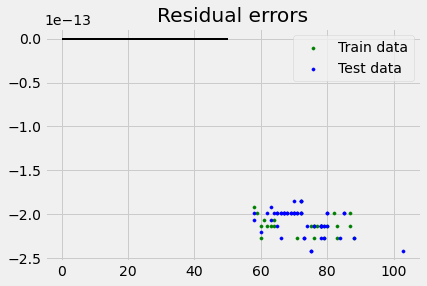

In [60]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

Nhận xét: Đồ thị trên xác định điểm chính xác bằng cách sử dụng điểm phương sai qua công thức: Explain_variance_score = 1 - Var {y - y '} / Var {y}

Trong đó y' là đầu ra mục tiêu ước tính, y là đầu ra mục tiêu tương ứng (đúng) và Var là Phương sai, bình phương của độ lệch chuẩn.

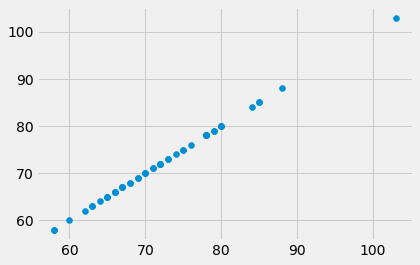

In [66]:
lm = LinearRegression()
lm.fit(X_train, y_train)

Y_pred = lm.predict(X_test)

plt.scatter(y_test, Y_pred)

In [ ]:
np.isnan(data.any()) #and gets False
np.isfinite(data.all()) #and gets True

Person          True
gender          True
Age             True
Height          True
pre.weight      True
Diet            True
weight6weeks    True
dtype: bool

In [61]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)

91.66


In [67]:
mse1 = sklearn.metrics.mean_squared_error(y_test, Y_pred)
print(mse1)

1.8276329452160402e-28
